#Data processing and visualization

## Importing required libraries

In [0]:
# linear algebra
import numpy as np 

# data processing

import pandas as pd 
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#LabelEncoder

from sklearn import preprocessing as PP

## Reading test and train datasets into dataframes

In [0]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

**Getting column names**

In [121]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Getting train dataset information**

In [122]:
train.info()

print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
(891, 12)
(418, 11)


## Checking for absent values in train and test

In [123]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Inference : Only 2 missing values in Embarked.**
**687/891 Cabin values are missing**

In [124]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Inference : Only 1 missing value in Fare.**
**327/418 Cabin values are missing**

## Characteristics of train

In [125]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hassan, Mr. Houssein G N",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Getting 5 random samples of the train dataset**

In [126]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S


## Creating secondary datasets (working datasets)

In [0]:
train1=train.copy()
test1=test.copy()

**Dropping unnecessary fields**

In [0]:
for df in test1,train1:
    df.drop(['PassengerId'],axis=1,inplace=True)
    df.drop(['Ticket'],axis=1,inplace=True)

**Filling the absent 'Age' values with the median values**

In [129]:
for df in test1,train1:
    df['Age'].fillna(df['Age'].median(), inplace = True)
print("Train:",train1['Age'].isnull().sum())
print("Test:",test1['Age'].isnull().sum())

Train: 0
Test: 0


**Filling absent Fare value in test**

In [0]:
#only one value is absent
test1['Fare'].fillna(test1['Age'].median(), inplace = True)

## Plot between Sex and Probability of Survival

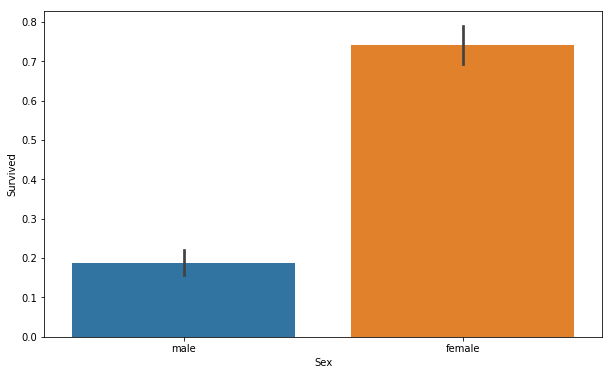

In [131]:
plt.figure(figsize=(10,6))

sns.barplot(x='Sex', y='Survived', data=train1)

**SNS PLOT TO VISUALIZE CORELATION BETWEEN DIFFERENT FEATURES**

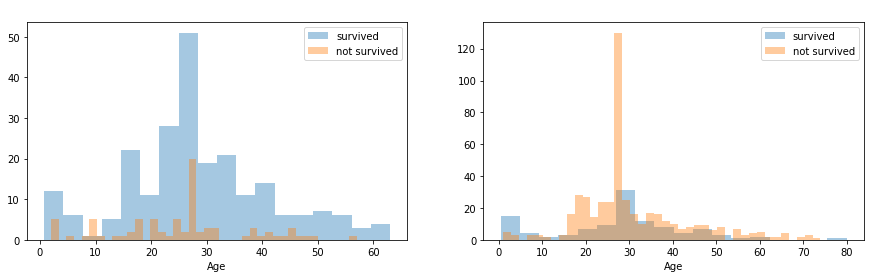

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 4))

women = train1[train1['Sex']=='female']
men = train1[train1['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female',color='w')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male',color='w')

##Relation between Embarked, Survival and Sex

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


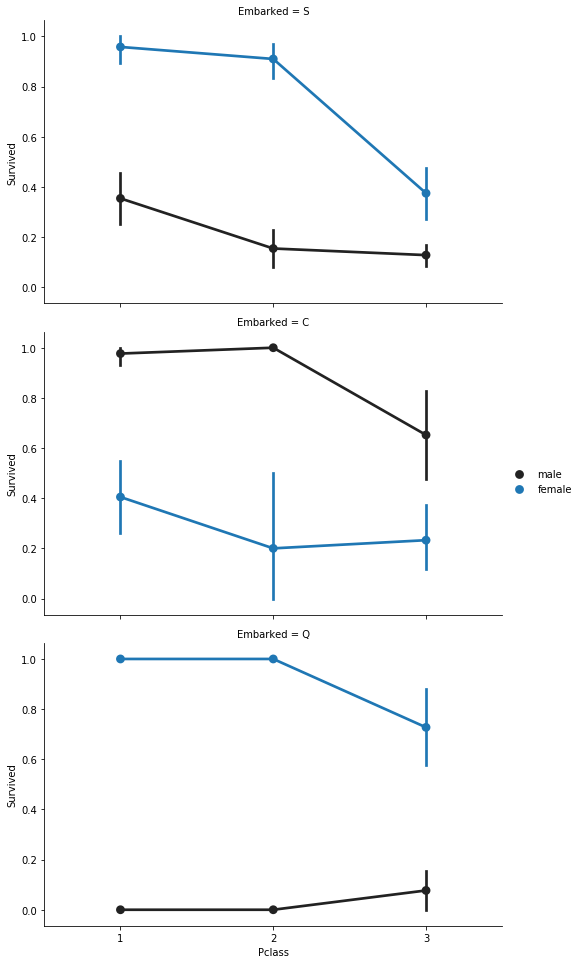

In [133]:
FacetGrid = sns.FacetGrid(train1, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

## Transforming the 'Sex' column to Binary

In [0]:
for df in train1,test1:
    df['Female'] = df['Sex'].map({"male": 0, "female": 1})  #One-hot encoding
for df in train1,test1:
    df.drop(['Sex'],axis=1,inplace=True)

**KDE PLOT BETWEEN SURVIVED AND FEMALE**

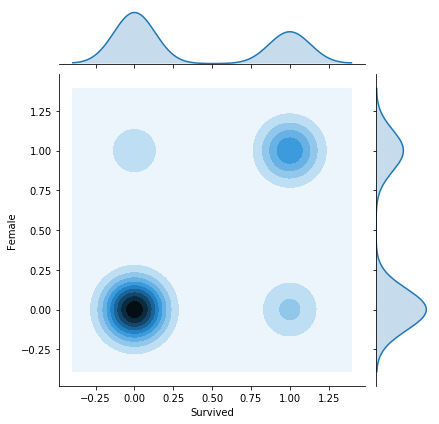

In [135]:
sns.jointplot(x=train1["Survived"], y=train1["Female"], kind='kde')  
plt.show()

###Men have a higher chance of **NOT** surviving than females surviving.

## Finding the mode and replacing missing 'Embarked' values and then labelling them

In [136]:
train1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [137]:
train1['Embarked'].mode()

0    S
dtype: object

In [138]:
train1['Embarked'].fillna(train1['Embarked'].mode()[0], inplace = True) # filling the null values of the column embarked with their mode
train1['Embarked'].isnull().sum()

0

In [0]:
for df in train1,test1:
    df['Embarked_Code'] = PP.LabelEncoder().fit_transform(df['Embarked']) # Creating a new column 'Embarked_code' with all the data from the column Embarked
for df in train1,test1:
    df.drop(['Embarked'],axis=1,inplace=True)

## Finding total number of passengers by calculating parent-children and sibling-spouse and single passengers

In [0]:
for df in train1,test1:
    df['NoOfPassengers']=df['SibSp'] + df['Parch'] + 1 

In [141]:
train1.sample(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Female,Embarked_Code,NoOfPassengers
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",28.0,0,0,7.8958,NaN,0,2,1
832,0,3,"Saad, Mr. Amin",28.0,0,0,7.2292,NaN,0,0,1
84,1,2,"Ilett, Miss. Bertha",17.0,0,0,10.5000,NaN,1,2,1
860,0,3,"Hansen, Mr. Claus Peter",41.0,2,0,14.1083,NaN,0,2,3
186,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",28.0,1,0,15.5000,NaN,1,1,2


## Finding if passenger is alone and if that has any contribution to survival

In [142]:
for df in train1,test1:
    df['IsAlone']=1
    df['IsAlone'].loc[df['NoOfPassengers'] > 1] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


###KDE PLOT TO SEE RELATION BETWEEN SURVIVED AND ALONE PASSENGERS

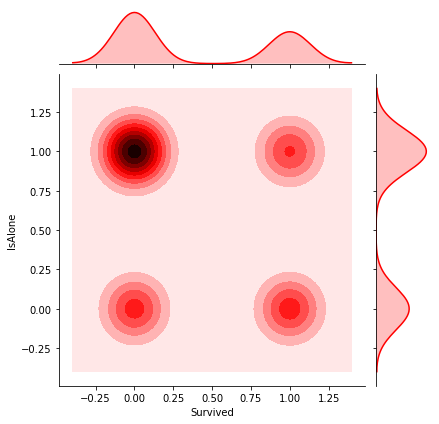

In [143]:
sns.jointplot(x=train1["Survived"], y=train1["IsAlone"], kind='kde',color='red')
plt.show()

**Inference: There is a lower chance of survival for people who are alone/have no accompanying passengers.**

## Finding relation between Passenger Class and Survival

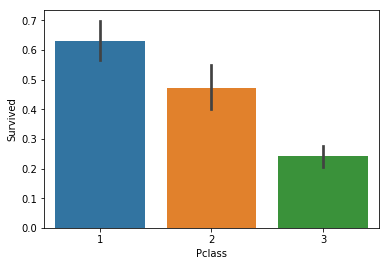

In [144]:
sns.barplot(x='Pclass', y='Survived', data=train1)

**Inference : As expected, 1st Class Passengers have the highest survival rate, while the 3rd have the lowest**

##Extracting title from name column

In [0]:
for df in train1,test1:
    df['Title']=df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [146]:
print("Before:",train1['Title'].value_counts(),sep="\n")
for df in train1,test1:
    initials = (df['Title'].value_counts() < 5)
    df['Title'] = df['Title'].apply(lambda x: 'Others' if initials.loc[x] == True else x)
print("\nAfter:",train1['Title'].value_counts(),sep="\n")

Before:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Capt              1
Ms                1
Don               1
Mme               1
Name: Title, dtype: int64

After:
Mr        517
Miss      182
Mrs       125
Master     40
Others     14
Dr          7
Rev         6
Name: Title, dtype: int64


###**Creating a new column 'Title_Code' labelEncoding the 'Title' column**

In [147]:
for df in train1,test1:
    df['Title_Code'] = PP.LabelEncoder().fit_transform(df['Title']) 
    df.drop(['Title','Name'],axis=1,inplace=True)
train1.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code
503,0,3,37.0,0,0,9.5875,NaN,1,2,1,1,2
46,0,3,28.0,1,0,15.5000,NaN,0,1,2,0,3
586,0,2,47.0,0,0,15.0000,NaN,0,2,1,1,3
380,1,1,42.0,0,0,227.5250,NaN,1,0,1,1,2
593,0,3,28.0,0,2,7.7500,NaN,1,1,3,0,2
871,1,1,47.0,1,1,52.5542,D35,1,2,3,0,4
600,1,2,24.0,2,1,27.0000,NaN,1,2,4,0,4
312,0,2,26.0,1,1,26.0000,NaN,1,2,3,0,4
245,0,1,44.0,2,0,90.0000,C78,0,1,3,0,0
722,0,2,34.0,0,0,13.0000,NaN,0,2,1,1,3


##Finding relation between Age and Survival and Fare and Survival

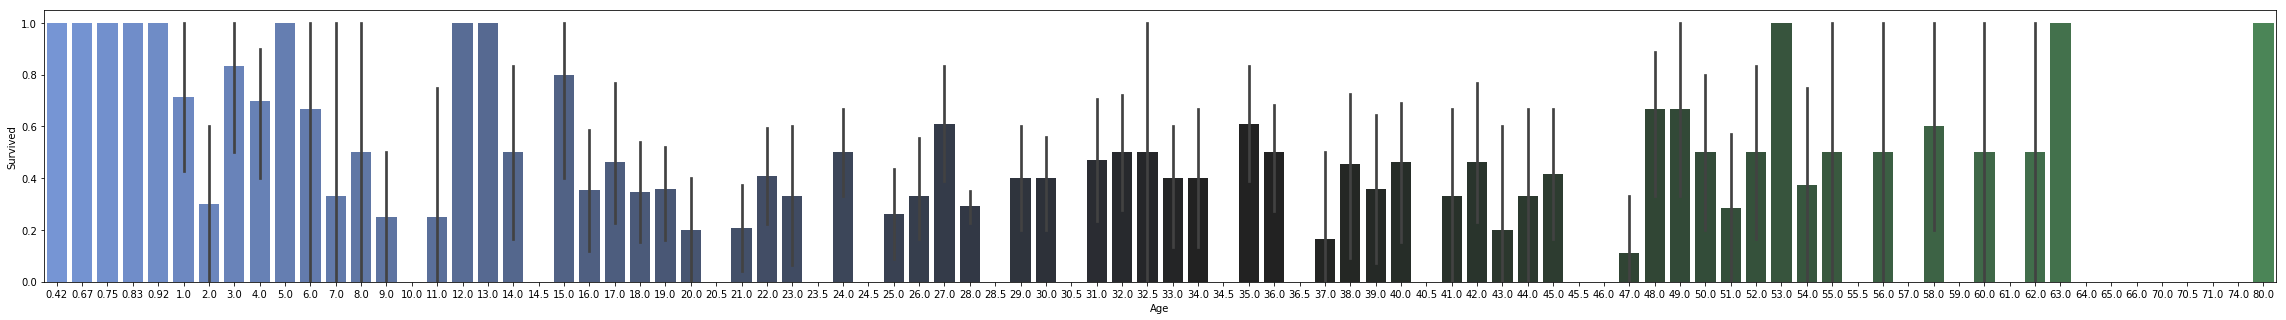

In [148]:
plt.figure(figsize=(40,5))

sns.barplot(x='Age', y='Survived', data=train1,palette=sns.diverging_palette(255, 133, l=60, n=95, center="dark"))

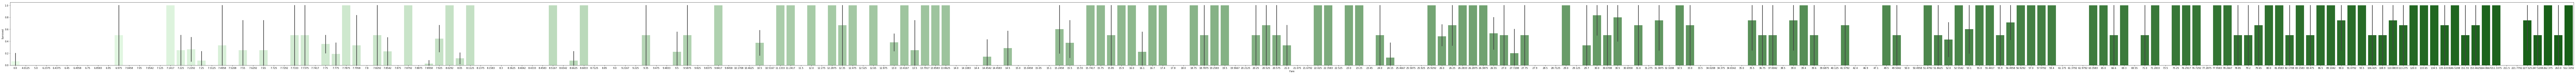

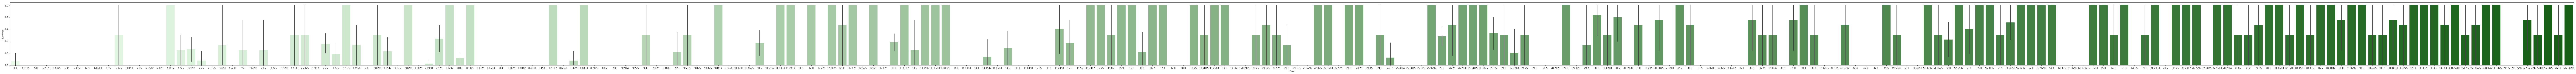

In [149]:
plt.figure(figsize=(200,5))

sns.barplot(x='Fare', y='Survived', data=train1,palette=sns.light_palette("darkgreen",n_colors=260))

##Dividing Fare and Age into bins and then encoding them

In [0]:
for df in train1,test1:
    df['FareBin'] = pd.qcut(df['Fare'], 10)

    df['AgeBin'] = pd.cut(df['Age'].astype(int), 10)

    df['FareBin_Code'] = PP.LabelEncoder().fit_transform(df['FareBin'])

    df['AgeBin_Code'] = PP.LabelEncoder().fit_transform(df['AgeBin'])

In [151]:
train1.sample(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin,AgeBin,FareBin_Code,AgeBin_Code
530,1,2,2.0,1,1,26.0000,NaN,1,2,3,0,2,"(21.679, 27.0]","(-0.08, 8.0]",6,0
400,1,3,39.0,0,0,7.9250,NaN,0,2,1,1,3,"(7.854, 8.05]","(32.0, 40.0]",2,4
532,0,3,17.0,1,1,7.2292,NaN,0,0,3,0,3,"(-0.001, 7.55]","(16.0, 24.0]",0,2


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin,AgeBin,FareBin_Code,AgeBin_Code
693,0,3,25.0,0,0,7.225,NaN,0,0,1,1,3,"(-0.001, 7.55]","(24.0, 32.0]",0,3
808,0,2,39.0,0,0,13.000,NaN,0,2,1,1,3,"(10.5, 14.454]","(32.0, 40.0]",4,4
529,0,2,23.0,2,1,11.500,NaN,0,2,4,0,3,"(10.5, 14.454]","(16.0, 24.0]",4,2


## Removing outliers from Age, Fare and then dropping uncoded fields

In [0]:
def remove_outlier(df_in, col_name):
      q1 = df_in[col_name].quantile(0.25)
      q3 = df_in[col_name].quantile(0.75)
      iqr = q3-q1 #Interquartile range
      fence_low  = q1-1.5*iqr
      fence_high = q3+1.5*iqr
      df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
      return df_out
cols=["Age","Fare"]
for col in cols:
     train2=remove_outlier(train1, col)
test2=test1 #for ease of understanding

In [153]:
print(train1.shape[0],train2.shape[0])

891 775
891 775


In [154]:
for df in train2,test1:
    df.drop(['Age','Fare','FareBin','AgeBin'],axis=1,inplace=True)
train2.sample(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code
757,0,2,0,0,NaN,0,2,1,1,3,4,2
374,0,3,3,1,NaN,1,2,5,0,2,5,0
858,1,3,0,3,NaN,1,0,4,0,4,5,2
634,0,3,3,2,NaN,1,2,6,0,2,7,1
586,0,2,0,0,NaN,0,2,1,1,3,5,5


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code
566,0,3,0,0,NaN,0,2,1,1,3,2,2
379,0,3,0,0,NaN,0,2,1,1,3,1,2
246,0,3,0,0,NaN,1,2,1,1,2,1,3
130,0,3,0,0,NaN,0,0,1,1,3,2,4
155,0,1,0,1,NaN,0,0,2,0,3,8,6


##Plot between Female and encoded Age

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


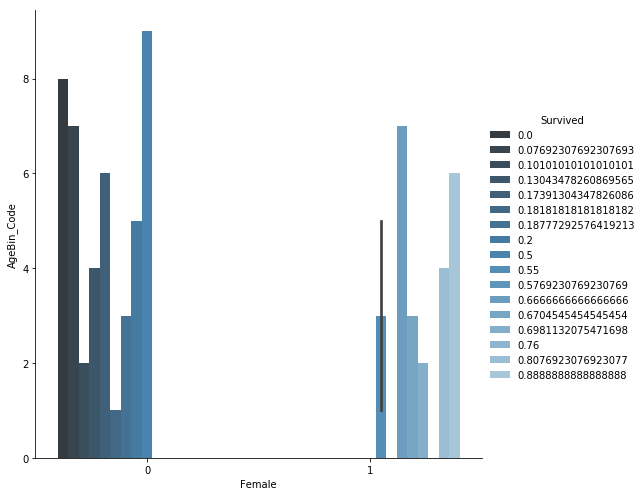

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


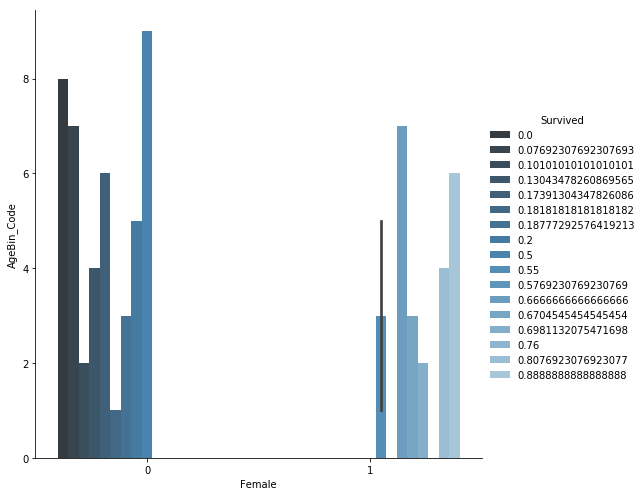

In [155]:
abc = train2.groupby(['Female','AgeBin_Code']).mean().reset_index()
sns.factorplot(x='Female', y='AgeBin_Code', hue='Survived', data=abc, kind='bar',size=7,palette=("Blues_d"))

##Creating new features from existing ones

In [156]:
train2.sample(1)

,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code
83,0,1,0,0,NaN,0,2,1,1,3,8,3


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code
631,0,3,0,0,NaN,0,2,1,1,3,0,6


Age+Class, since age and class are related

In [157]:
for df in train2,test2:
    df['Age+Class']= df['AgeBin_Code']* df['Pclass']
train2.sample(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code,Age+Class
764,0,3,0,0,NaN,0,2,1,1,3,1,1,3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code,Age+Class
135,0,2,0,0,NaN,0,0,1,1,3,5,2,4


Fare per person, i.e. coded Fare / NoOfPassengers

In [158]:
for df in train2,test2:
    df['Fare_Single']= df['FareBin_Code']* df['NoOfPassengers']
train2.sample(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code,Age+Class,Fare_Single
392,0,3,2,0,NaN,0,2,3,0,3,2,3,9,6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,SibSp,Parch,Cabin,Female,Embarked_Code,NoOfPassengers,IsAlone,Title_Code,FareBin_Code,AgeBin_Code,Age+Class,Fare_Single
165,1,3,0,2,NaN,0,2,3,0,1,5,1,3,15


Extracting Deck from Cabin

In [159]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for df in train2,test2:
    df['Cabin'] = df['Cabin'].fillna("U0")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)
    df.drop(['Cabin'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

## Heatmap to find feature co-relations

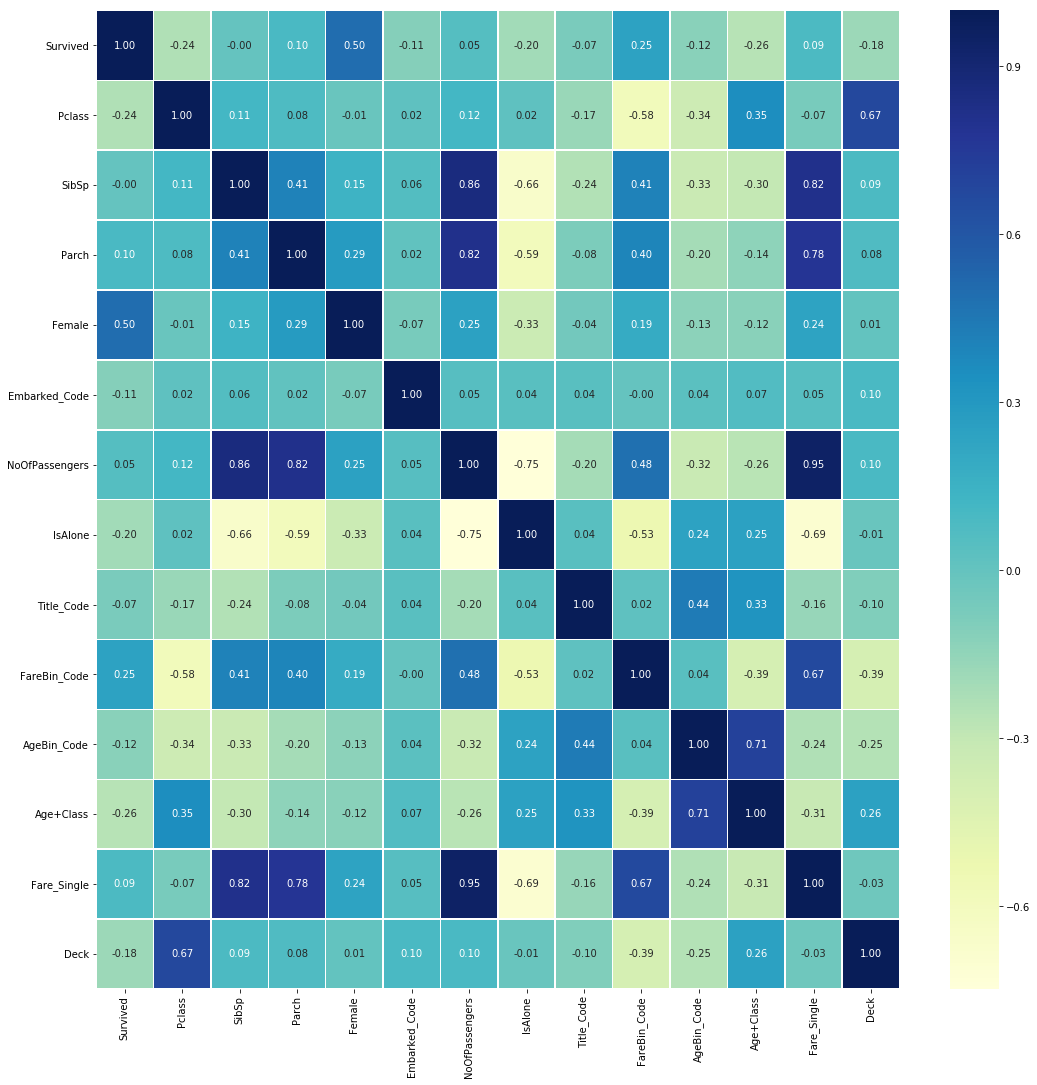

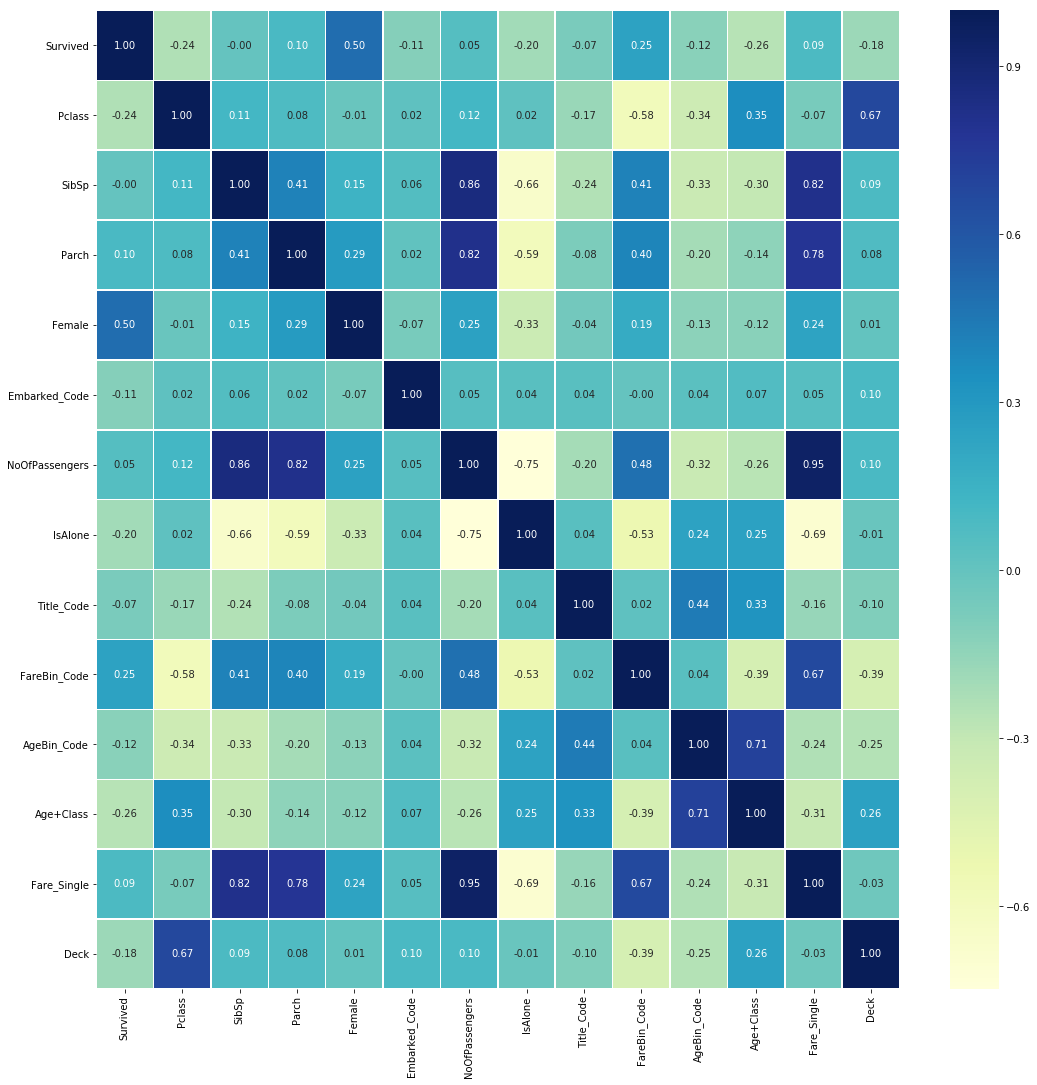

In [160]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train2.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="YlGnBu")

##Checking finalized datasets

In [161]:
print(train2.columns.values,test2.columns.values,sep="\n\n")

['Survived' 'Pclass' 'SibSp' 'Parch' 'Female' 'Embarked_Code'
 'NoOfPassengers' 'IsAlone' 'Title_Code' 'FareBin_Code' 'AgeBin_Code'
 'Age+Class' 'Fare_Single' 'Deck']

['Pclass' 'SibSp' 'Parch' 'Female' 'Embarked_Code' 'NoOfPassengers'
 'IsAlone' 'Title_Code' 'FareBin_Code' 'AgeBin_Code' 'Age+Class'
 'Fare_Single' 'Deck']
['Survived' 'Pclass' 'SibSp' 'Parch' 'Female' 'Embarked_Code'
 'NoOfPassengers' 'IsAlone' 'Title_Code' 'FareBin_Code' 'AgeBin_Code'
 'Age+Class' 'Fare_Single' 'Deck']

['Pclass' 'SibSp' 'Parch' 'Female' 'Embarked_Code' 'NoOfPassengers'
 'IsAlone' 'Title_Code' 'FareBin_Code' 'AgeBin_Code' 'Age+Class'
 'Fare_Single' 'Deck']


#Validation & Testing

##Importing required libraries

In [0]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

##Training models

In [0]:
X_train = train2.drop("Survived", axis=1)
Y_train = train2["Survived"]
X_test = test2

**Stochastic Gradient Descent (SGD):**

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

**Random Forest:**

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

**Logistic Regression:**

In [166]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**K Nearest Neighbor:**

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**Gaussian Naive Bayes:**

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron (Neural Network with single output):**

In [169]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**Linear Support Vector Machine (SVM):**

In [170]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Decision Tree:**

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

##Choosing and validating best model

In [172]:
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest',
                                  'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Decision Tree'],
                        'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, 
                                  acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.00,Random Forest
92.00,Decision Tree
83.48,KNN
78.97,Support Vector Machines
78.84,Logistic Regression
76.65,Naive Bayes
73.68,Perceptron
72.52,Stochastic Gradient Descent


,Model
Score,
92.00,Random Forest
92.00,Decision Tree
83.48,KNN
79.10,Support Vector Machines
78.84,Logistic Regression
76.65,Naive Bayes
73.68,Perceptron
67.61,Stochastic Gradient Descent



**Random Forest is hence, the best model**

In [173]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75949367 0.81012658 0.75641026 0.76623377 0.83116883 0.83116883
 0.81818182 0.81818182 0.83116883 0.81818182]
Mean: 0.8040316223860527
Standard Deviation: 0.029201401527580984
Scores: [0.7721519  0.81012658 0.73076923 0.75324675 0.83116883 0.84415584
 0.81818182 0.81818182 0.83116883 0.79220779]
Mean: 0.8001359400093578
Standard Deviation: 0.03531465882490537


The accuracy is (82.08 ± 4.04)%

In [174]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Female,0.199
Title_Code,0.128
Fare_Single,0.115
Age+Class,0.109
FareBin_Code,0.092
AgeBin_Code,0.075
Deck,0.060
Pclass,0.055
Embarked_Code,0.054


,importance
feature,
Female,0.192
Title_Code,0.130
Fare_Single,0.118
Age+Class,0.109
FareBin_Code,0.091
AgeBin_Code,0.081
Deck,0.058
Pclass,0.055
Embarked_Code,0.050


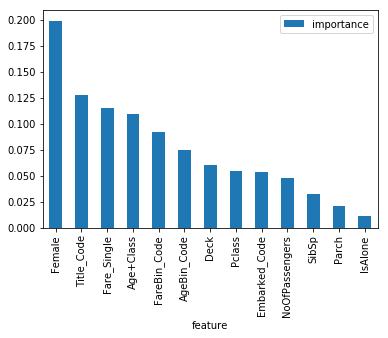

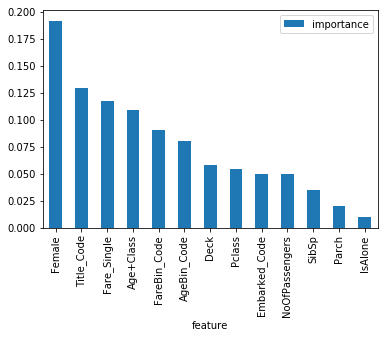

In [175]:
importances.plot.bar()

Dropping features of less importance and fitting in random forest model:

In [176]:
for df in train2,test2:
    df.drop(['Parch','SibSp'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [178]:
X_train,X_test=train2.drop(['Survived'],axis=1),test2
Y_train=train2['Survived']
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

91.87


**Hence the data is analysed and the best fit model is created with an accuracy of 91.87%**